In [2]:
from google.colab import files
uploaded = files.upload()

Saving S__131957024.jpg to S__131957024.jpg


(732, 828)


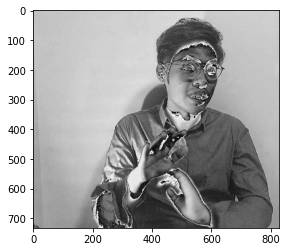

In [14]:
image_path = '/content/S__131957024.jpg'
img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
img = img[:,:,0] + img[:,:,1]
print(img.shape)
plt.imshow(img, cmap='gray')

(732, 828, 3)


[{'box': [454, 97, 174, 251],
  'confidence': 0.999990701675415,
  'keypoints': {'left_eye': (526, 191),
   'mouth_left': (522, 284),
   'mouth_right': (581, 292),
   'nose': (573, 244),
   'right_eye': (601, 202)}}]

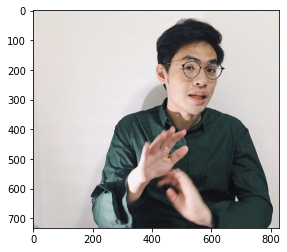

In [16]:
! pip install mtcnn
from mtcnn import MTCNN
import cv2
import imageio
import matplotlib.pyplot as plt

image_path = '/content/S__131957024.jpg'
img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)
detector = MTCNN()
detections = detector.detect_faces(img)
detections

(-0.5, 827.5, 731.5, -0.5)

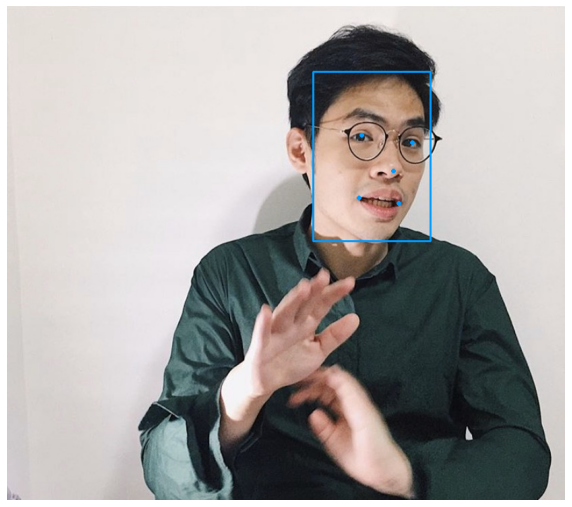

In [17]:
img_with_dets = img.copy()
min_conf = 0.9
for det in detections:
    if det['confidence'] >= min_conf:
        x, y, width, height = det['box']
        keypoints = det['keypoints']
        cv2.rectangle(img_with_dets, (x,y), (x+width,y+height), (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['left_eye']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['right_eye']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['nose']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['mouth_left']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['mouth_right']), 2, (0,155,255), 2)
plt.figure(figsize = (10,10))
plt.imshow(img_with_dets)
plt.axis('off')

# References:
- https://github.com/ipazc/mtcnn/blob/master/example.ipynb
- https://github.com/ipazc/mtcnn